In [4]:
# Add intercept 
import numpy as np
def add_intercept(X):
    """ Returns: New matrix same as X with 1's in the 0th column. """
    new_X = X.to_numpy()
    new_X = np.zeros((X.shape[0], X.shape[1]+1), dtype = np.float)
    new_X[:, 0] = 1
    new_X[:,1:] = X
    new_X = pd.DataFrame(new_X)

    return new_X

In [5]:
import pandas as pd
import numpy as np

#load data
train_path = "/content/drive/My Drive/Colab Notebooks/CS229/ps1/data/ds3_train.csv"
eval_path = "/content/drive/My Drive/Colab Notebooks/CS229/ps1/data/ds3_valid.csv"
test_path = "/content/drive/My Drive/Colab Notebooks/CS229/ps1/data/ds3_test.csv"

train = pd.read_csv(train_path)
X_train = train.copy().drop(axis=1, columns=["y", "t"])
X_train = add_intercept(X_train)
y_train = train["y"]
t_train = train["t"]

eval = pd.read_csv(eval_path)
X_eval = eval.copy().drop(axis=1, columns=["y", "t"])
X_eval = add_intercept(X_eval)
y_eval = eval["y"]
t_eval = eval["t"]

test = pd.read_csv(test_path)
X_test = test.copy().drop(axis=1, columns=["y", "t"])
X_test = add_intercept(X_test)
y_test = test["y"]
t_test = test["t"]

In [6]:
class LogisticRegression(object):
    def __init__(self, theta=None):
        self.theta = None

    def fit(self, X, y, eps=1e-5):    
        #function g
        self.eps = eps
        g = lambda X: 1 / (1 + np.exp(-X))
        m, n = X.shape
        
        # starting theta = 0
        if self.theta is None:
            self.theta = np.zeros(n)
        
        # update theta
        while True:
            theta = self.theta
            
            # J 
            X_theta = X.dot(theta)
            J = -(1/m)*(y-g(X_theta)).dot(X)
            
            # H 
            H = (1/m)*g(X_theta).dot(g(1-X_theta))*(X.T).dot(X)
            H_inv = np.linalg.inv(H)
            
            # theta update using Newton's Method
            self.theta = theta - H_inv.dot(J)
         
            # if norm is small, then break
            if np.linalg.norm(self.theta-theta, ord=1)<self.eps:
                break

    def predict(self, X):
        g = lambda X: 1 / (1 + np.exp(-X))
        preds = g(X.dot(self.theta))
        return preds

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

#train a logistic regression classifier
model = LogisticRegression()
model.fit(X_train.to_numpy(), y_train.to_numpy())
model.theta

array([-2.83903287,  0.73041906,  0.09775442])

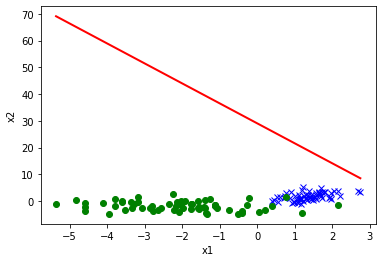

In [8]:
# Plot decision boundary on top of validation set 
y_pred = model.predict(X_test)

plt.plot(test[test["t"]==1]["x_1"], test[test["t"]==1]["x_2"], "bx")
plt.plot(test[test["t"]==0]["x_1"], test[test["t"]==0]["x_2"], "go")
plt.xlabel("x1")
plt.ylabel("x2")

X_test = X_test.to_numpy()
theta = model.theta
x1 = np.arange(min(X_test[:, -2]), max(X_test[:, -2]), 0.01)
x2 = -(theta[0]/theta[2] * 1+theta[1]/theta[2]*x1)
plt.plot(x1, x2, c='red', linewidth=2)

plt.show()